In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir('../../')

In [3]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

tf.config.run_functions_eagerly(True)

In [4]:
def shift_data(origin, d):
    shift_d = np.concatenate((origin[0][1::], d), axis=0).reshape(1, 12, 1)
    return shift_d

In [5]:
df = pd.read_excel('./documents/nov_nine_var.xlsx').iloc[:,1::].to_numpy()

scaler = MinMaxScaler()
scale_df = scaler.fit_transform(df)

data = scale_df[:,0:21][-1-12:-1].reshape(1, 12, 21)

In [6]:
def make_dataset(d, length=12, test_size=0.2):
    X_data, y_data = [], []

    for i in range(0, len(d)-length-1):
        X_data.append(d[i:i+length])
        y_data.append(d[i+length+1])

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    
    da = train_test_split(X_data, y_data, test_size=test_size, shuffle=False)
    da[0] = da[0].reshape(len(da[0]), 12, 1)
    da[1] = da[1].reshape(len(da[1]), 12, 1)
    da[2] = da[2].reshape(len(da[2]), 1)
    da[3] = da[3].reshape(len(da[3]), 1)
    
    return da

In [7]:
class Model_(tf.keras.Model):
    def __init__(self):
        super(Model_, self).__init__()
        self.d0 = tf.keras.layers.LSTM(16, activation='tanh', return_sequences=False, dropout=0.2)
        self.d2 = tf.keras.layers.Dense(8, activation='relu')
        self.d3 = tf.keras.layers.Dense(units=1, activation='linear')

    def call(self, inputs):
        x = self.d0(inputs)
        x = self.d2(x)
        x = self.d3(x)

        return x

In [8]:
model_list = [[Model_() for i in range(21)] for j in range(5)] # model_list.shape = 5, 21, model
for j in range(5):
    for i in range(21):
        d = make_dataset(scale_df[:,i])
        model = model_list[j][i]
        model.build(input_shape=(1, 12, 1))
        model.compile(optimizer='adam', loss='mse')

        model.fit(d[0], d[2], epochs=1, batch_size=128, validation_data=(d[1], d[3]), verbose=0)
        model.save('./model/one_lstm/one_lstm_{0}/{1}_model'.format(j, i))

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/0_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/0_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/1_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/1_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/2_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/2_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/3_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/3_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/4_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/4_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/5_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/5_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/6_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/6_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/7_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/7_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/8_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/8_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/9_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/9_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/10_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/10_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/11_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/11_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/12_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/12_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/13_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/13_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/14_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/14_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/15_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/15_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/16_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/16_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/17_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/17_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/18_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/18_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/19_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/19_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/20_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_0/20_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/0_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/0_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/1_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/1_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/2_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/2_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/3_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/3_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/4_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/4_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/5_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/5_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/6_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/6_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/7_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/7_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/8_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/8_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/9_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/9_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/10_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/10_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/11_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/11_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/12_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/12_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/13_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/13_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/14_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/14_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/15_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/15_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/16_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/16_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/17_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/17_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/18_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/18_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/19_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/19_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/20_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_1/20_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/0_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/0_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/1_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/1_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/2_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/2_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/3_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/3_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/4_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/4_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/5_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/5_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/6_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/6_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/7_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/7_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/8_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/8_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/9_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/9_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/10_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/10_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/11_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/11_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/12_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/12_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/13_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/13_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/14_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/14_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/15_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/15_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/16_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/16_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/17_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/17_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/18_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/18_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/19_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/19_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/20_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_2/20_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/0_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/0_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/1_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/1_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/2_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/2_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/3_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/3_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/4_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/4_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/5_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/5_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/6_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/6_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/7_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/7_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/8_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/8_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/9_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/9_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/10_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/10_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/11_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/11_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/12_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/12_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/13_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/13_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/14_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/14_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/15_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/15_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/16_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/16_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/17_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/17_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/18_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/18_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/19_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/19_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/20_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_3/20_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/0_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/0_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/1_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/1_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/2_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/2_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/3_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/3_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/4_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/4_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/5_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/5_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/6_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/6_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/7_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/7_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/8_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/8_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/9_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/9_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/10_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/10_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/11_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/11_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/12_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/12_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/13_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/13_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/14_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/14_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/15_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/15_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/16_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/16_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/17_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/17_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/18_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/18_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/19_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/19_model\assets
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/20_model\assets


INFO:tensorflow:Assets written to: ./model/one_lstm/one_lstm_4/20_model\assets


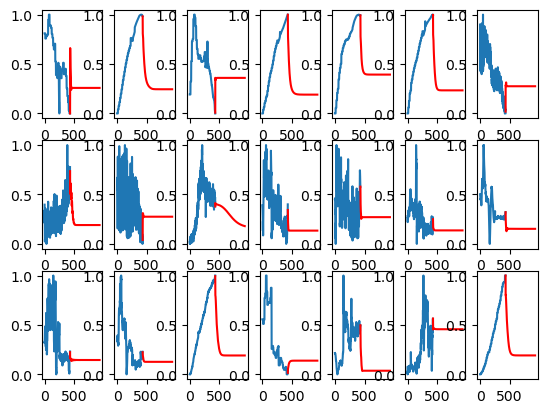

In [31]:
real_axis = [i for i in range(scale_df.shape[0])]
pred_axis = [i + scale_df.shape[0] for i in range(500)]

for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.plot(real_axis, scale_df[:, i])

    a = np.zeros((500, 1))
    pred = scale_df[:, i][-13:-1].reshape(1, 12, 1)
    for j in range(500):
        a[j] = pred[0][-1]
        pred = shift_data(pred, model_list[i](pred))
    
    plt.plot(pred_axis, a[:,0], c='r')

plt.show()

In [33]:
a = 0
for i in range(21):
    da = make_dataset(scale_df[:,-1])
    a += model_list[i].evaluate(da[1], da[3])
print(a)

3/3 [==============================] - 0s 35ms/step - loss: 0.0434


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 26ms/step - loss: 0.0321
1.3165116477757692


In [34]:
a/21

0.0626910308464652